# 1 Machine Learning

Specifically analyze which species can represent the characteristics of a certain population using machine learning.

* Preprocess the data: Before applying any machine learning algorithm, it's important to preprocess the data to ensure it is in the appropriate format and there are no missing or inconsistent values. This may involve removing or imputing missing values, standardizing the data, and encoding categorical variables as numerical values.

* Split the data: Split the data into a training set and a test set. The training set will be used to train the machine learning model, while the test set will be used to evaluate the performance of the model on new, unseen data.

* Choose a machine learning algorithm: Choose a machine learning algorithm that is appropriate for your dataset and research question. For example, you could use a decision tree, random forest, or gradient boosting algorithm for regression.

* Train the model: Train the model on the training data. This involves fitting the algorithm to the training data, using 'pm4' as the target variable and the other columns as predictors.

* Evaluate the model: Evaluate the performance of the model on the test data. This may involve calculating various metrics, such as mean squared error, R-squared, and root mean squared error, to assess how well the model is able to predict 'pm4' based on the other variables in the dataset.

* Identify important predictors: After training the model, you can identify the most important predictors of 'pm4'. For example, you could use feature importance scores to rank the variables in order of importance.

* Analyze which species can represent the characteristics of a certain population: Based on the results of the machine learning analysis, you can identify which species are the best predictors of 'pm4'. These species may represent the characteristics of a certain population, depending on the specific nature of the data and the research question.

In [49]:
# import relevant libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# 2 Load Data

In [50]:
# load the datasets
archaea = pd.read_csv("Archaea.csv")
bacteria = pd.read_csv("Bacteria.csv")
fungus = pd.read_csv("fungus.csv")
virus = pd.read_csv("virus.csv")

In [51]:
#backup
df_fungus = fungus.copy(deep=True)

# set the 'name' column as the index
df_fungus = fungus.set_index("ASV")

df_fungus.head(7)

,Domain,Kingdom,Phylum,Class,Order,Family,Genus,Species,SUM,Percent,...,p8,c13,pm2,c3,pm4,pm5,pm6,pm7,pm8,pm9
ASV,,,,,,,,,,,,,,,,,,,,,
ASV413,d__Eukaryota,k__Fungi,p__Ascomycota,c__Saccharomycetes,o__Saccharomycetales,f__Saccharomycetales_fam_Incertae_sedis,g__Candida,s__Candida_albicans,95969,0.054853,...,0,0,0,0,0,0,0,0,0,0
ASV970,d__Eukaryota,k__Fungi,p__Ascomycota,c__Saccharomycetes,o__Saccharomycetales,f__Saccharomycetales_fam_Incertae_sedis,g__Candida,s__Candida_albicans,2882,0.001647,...,0,0,0,0,0,0,0,0,0,0
ASV11,d__Eukaryota,k__Fungi,p__Ascomycota,c__Eurotiomycetes,o__Eurotiales,f__Aspergillaceae,g__Aspergillus,s__unclassified_g__Aspergillus,89015,0.050879,...,1814,698,789,13,1266,451,1247,134,1132,613
ASV1,d__Eukaryota,k__Fungi,p__Basidiomycota,c__Tremellomycetes,o__Trichosporonales,f__Trichosporonaceae,g__Apiotrichum,s__unclassified_g__Apiotrichum,573839,0.327992,...,8155,2779,12386,3655,12088,9760,14581,13921,15390,16039
ASV3,d__Eukaryota,k__Fungi,p__Basidiomycota,c__Tremellomycetes,o__Tremellales,f__Tremellaceae,g__Cryptococcus_f__Tremellaceae,s__Cryptococcus_cyanovorans,177670,0.101552,...,6658,1494,6101,1860,5264,6783,6931,5940,3258,3280
ASV29,d__Eukaryota,k__Fungi,p__Ascomycota,c__Eurotiomycetes,o__Eurotiales,f__Aspergillaceae,g__Monascus,s__unclassified_g__Monascus,16688,0.009538,...,1086,71,635,0,113,0,253,0,317,0
ASV194,d__Eukaryota,k__Fungi,p__Ascomycota,c__Saccharomycetes,o__Saccharomycetales,f__Saccharomycetales_fam_Incertae_sedis,g__Candida,s__Candida_parapsilosis,65422,0.037394,...,966,3533,785,481,1496,1956,0,921,0,66


# 3 Data Cleaning
* Check for missing values and outliers, and remove or impute them as necessary. 
* Check for duplicated rows, and remove them if applicable.

###  missing values

>no columns with missing values

# 4 Data Exploration
* descriptive

In [52]:
# display basic statistics of the abundance data
df_fungus.describe()

,SUM,Percent,P12,C2,Pm3,C4,C5,C6,C7,P1,...,p8,c13,pm2,c3,pm4,pm5,pm6,pm7,pm8,pm9
count,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,...,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000
mean,1024.327869,0.000585,21.626464,18.642272,20.207260,16.758197,22.153981,17.234778,16.964286,17.160422,...,31.566745,16.317330,18.617096,11.672131,19.046253,16.846019,21.888173,18.618852,17.018150,19.040984
std,15062.243909,0.008609,387.657163,191.001128,373.448794,207.161296,249.303050,176.549783,259.901992,473.604970,...,295.309153,172.838768,341.683205,204.335244,331.236116,295.256921,405.601751,371.586345,383.704519,400.371603
min,2.000000,0.000001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000011,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,66.500000,0.000038,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,196.250000,0.000112,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,573839.000000,0.327992,12133.000000,5620.000000,14867.000000,6881.000000,5951.000000,4542.000000,9802.000000,19108.000000,...,8155.000000,3631.000000,12386.000000,7230.000000,12088.000000,9760.000000,14581.000000,13921.000000,15390.000000,16039.000000


### EDA

#### Species vs pm4

In [53]:
# df = df_fungus[["ASV", "Species", "pm4"]]
# df2 = df[df["pm4"]== 0]
# set_0 = set(df2.Species)
# df3 = df[df["pm4"]!= 0]
# set_1 = set(df3.Species)
# df2

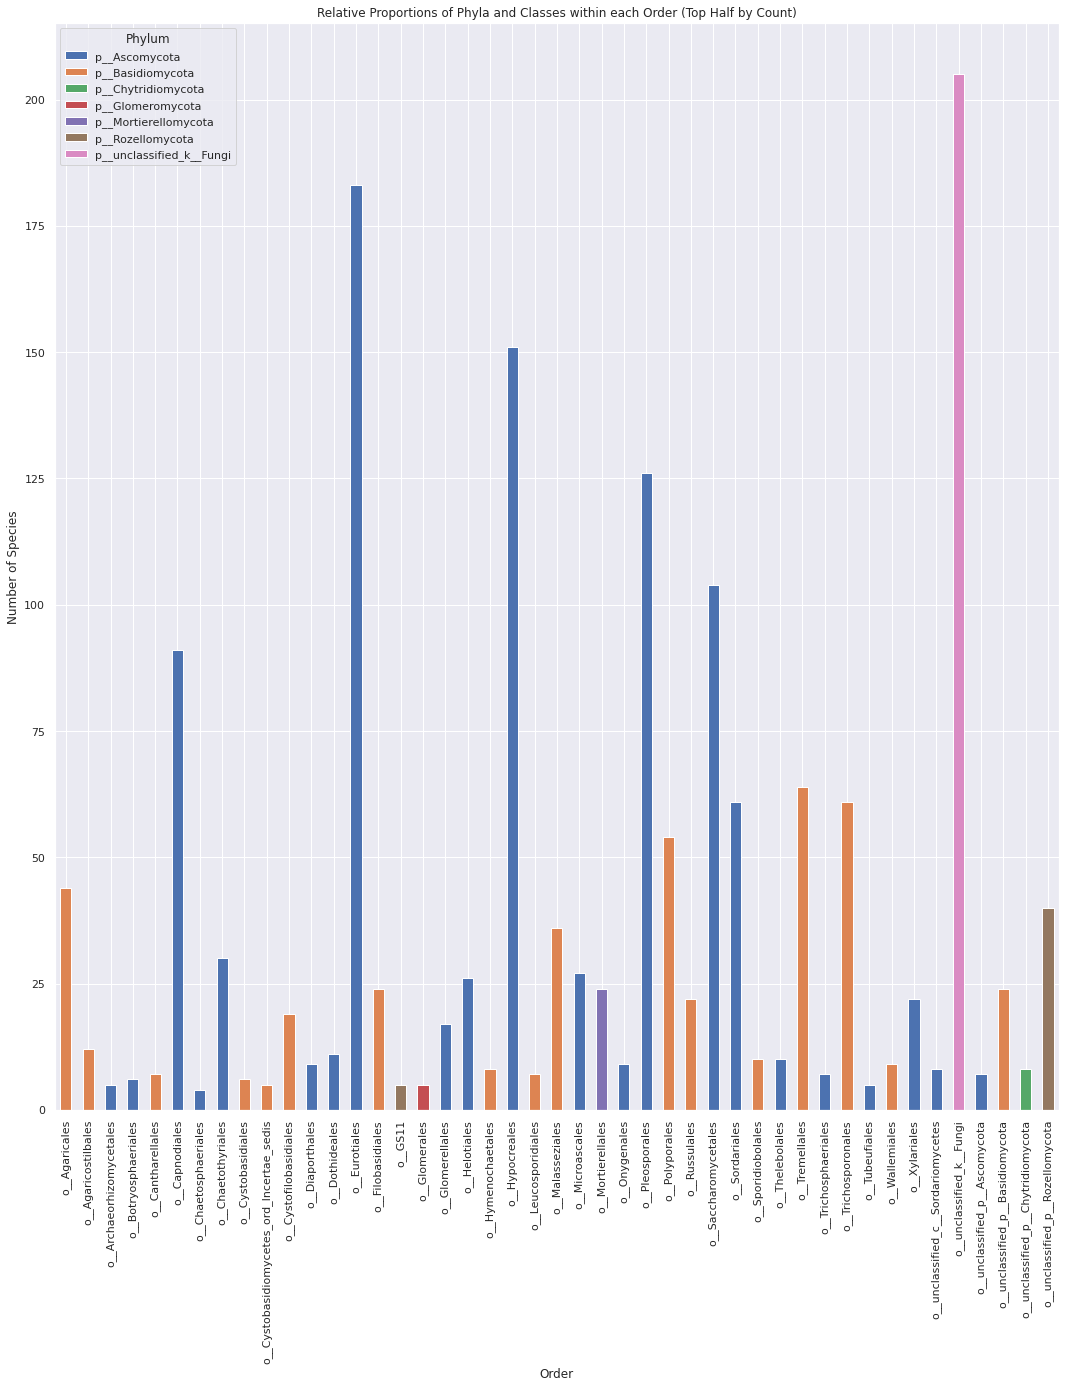

In [54]:
# calculate total count for each order
order_counts = df_fungus.groupby('Order')['Class'].count()
order_counts = order_counts.sort_values(ascending=False)  # sort in descending order

# select the top half of orders by count
num_orders = len(order_counts)
top_orders = order_counts[:num_orders//2]

# create the stacked bar chart for the top orders
df_fungus_ordered = df_fungus[df_fungus['Order'].isin(top_orders.index)]
df_fungus_ordered.groupby(['Order', 'Phylum'])['Class'].count().unstack().plot(kind='bar', 
                                                                               stacked=True, figsize=(18, 20))

# add labels and title
plt.xlabel('Order')
plt.ylabel('Number of Species')
plt.title('Relative Proportions of Phyla and Classes within each Order (Top Half by Count)')

# show plot
plt.show()


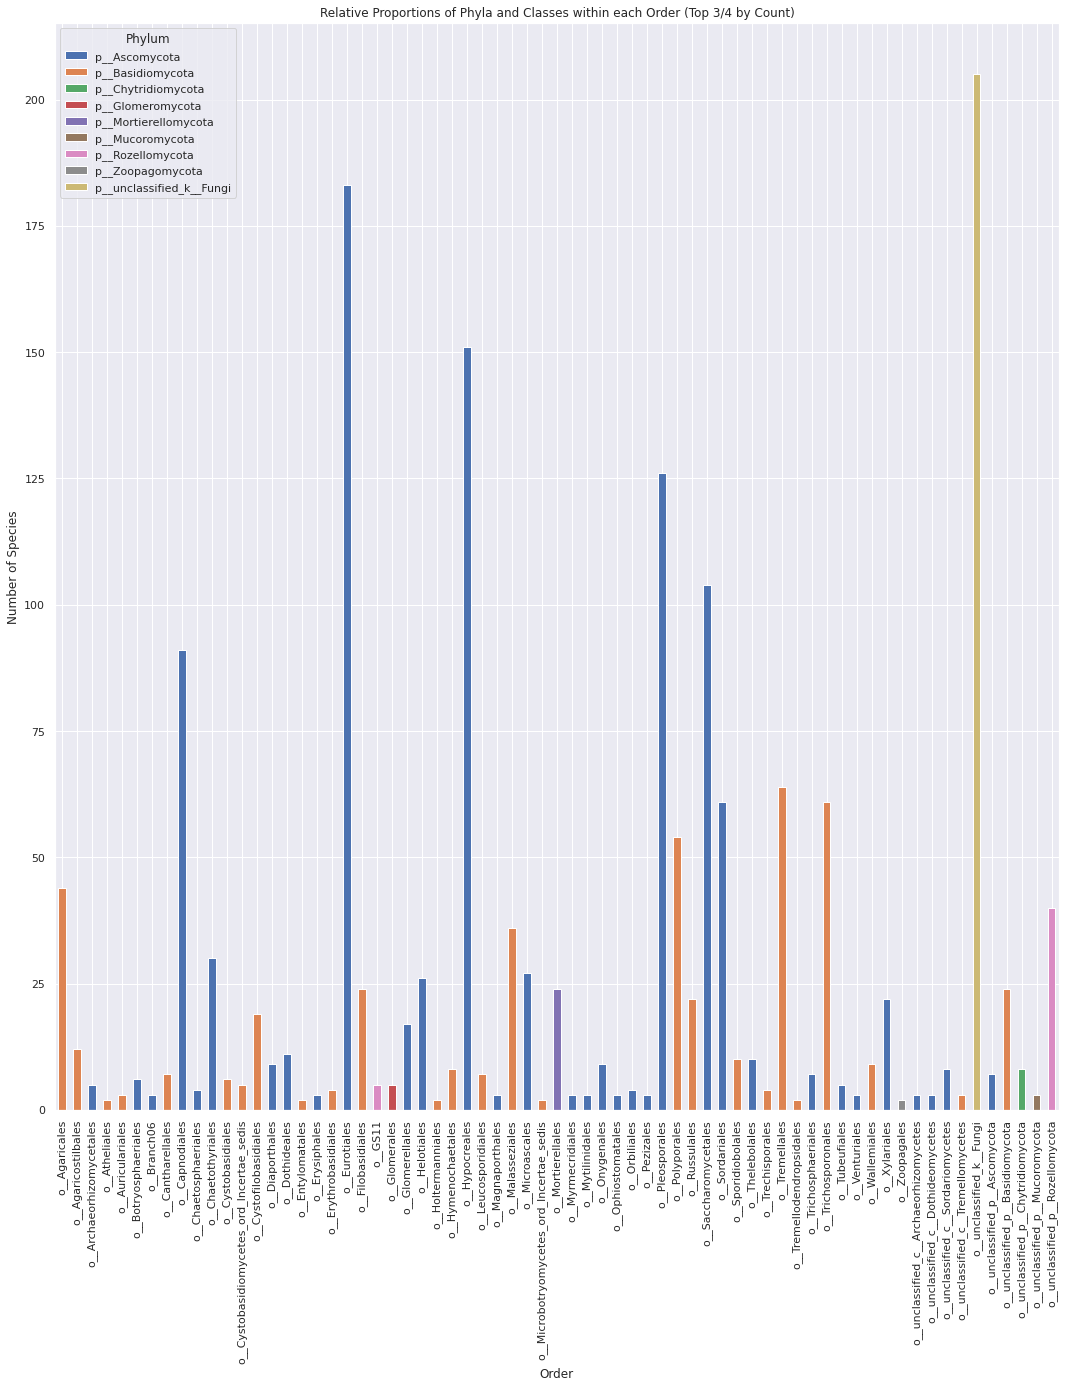

In [55]:
# calculate total count for each order
order_counts = df_fungus.groupby('Order')['Class'].count()
order_counts = order_counts.sort_values(ascending=False)  # sort in descending order

# select the top 3/4 of orders by count
num_orders = len(order_counts)
top_orders = order_counts[:int(num_orders*3/4)]

# create the stacked bar chart for the top orders
df_fungus_ordered = df_fungus[df_fungus['Order'].isin(top_orders.index)]
df_fungus_ordered.groupby(['Order', 'Phylum'])['Class'].count().unstack().plot(kind='bar', stacked=True, figsize=(18, 20))

# add labels and title
plt.xlabel('Order')
plt.ylabel('Number of Species')
plt.title('Relative Proportions of Phyla and Classes within each Order (Top 3/4 by Count)')

# show plot
plt.show()


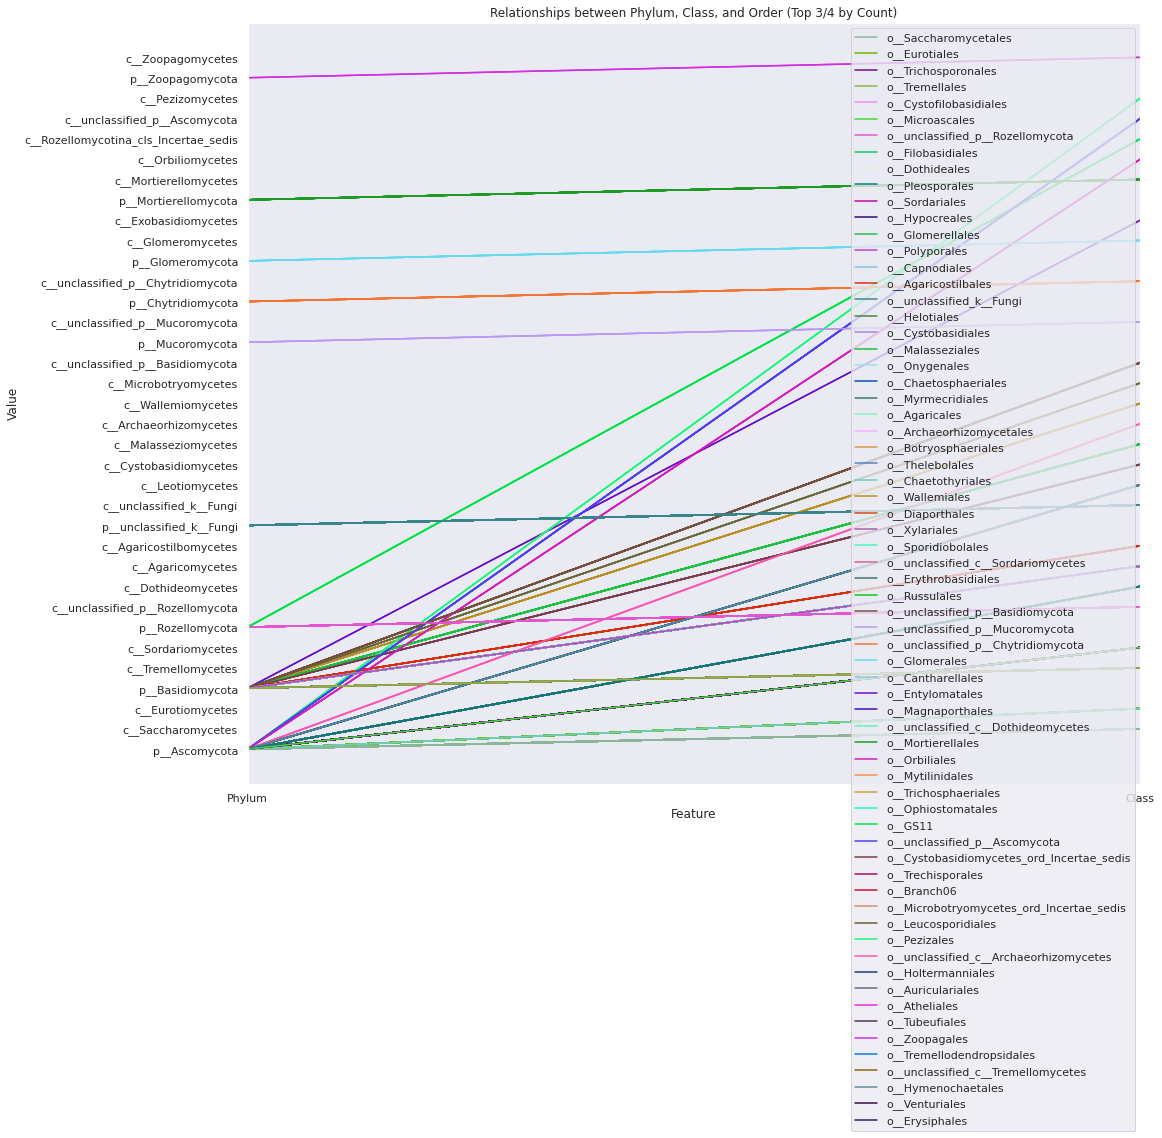

In [56]:
from pandas.plotting import parallel_coordinates
sns.set(rc={'figure.figsize':(16,14)})

# calculate total count for each order
order_counts = df_fungus.groupby('Order')['Class'].count()
order_counts = order_counts.sort_values(ascending=False)  # sort in descending order

# select the top orders by count
num_orders = len(order_counts)
top_orders = order_counts[:int(num_orders*3/4)]
top_orders = top_orders.index.tolist()

# select only the top orders in the dataframe
df_fungus_top = df_fungus[df_fungus['Order'].isin(top_orders)]

# create the parallel coordinates plot for the top orders
parallel_coordinates(df_fungus_top[['Phylum', 'Class', 'Order']], 'Order')

# add labels and title
plt.xlabel('Feature')
plt.ylabel('Value')
plt.title('Relationships between Phylum, Class, and Order (Top 3/4 by Count)')

# show plot
plt.show()

### tree map

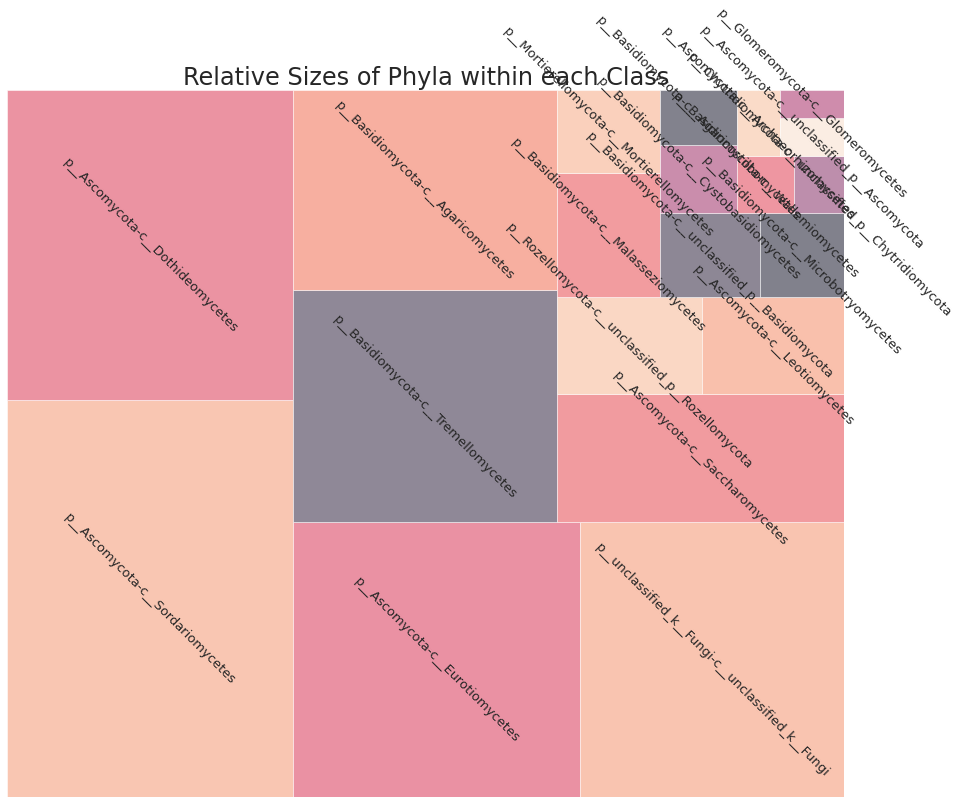

In [57]:
# import neccesary library
import squarify

fig = plt.gcf()
fig.set_size_inches(15, 13)


# calculate the number of species in each Phylum-Class combination
counts = df_fungus.groupby(['Phylum', 'Class'])['Order'].count().reset_index()

n = 20
top_counts = counts.sort_values(by='Order', ascending=False).head(n)
squarify.plot(sizes=top_counts['Order'], label=top_counts['Phylum'] + '-' + top_counts['Class'], 
              alpha=.5, text_kwargs={'fontsize':13, 'rotation':-45})

# add labels and title
plt.axis('off')
plt.title('Relative Sizes of Phyla within each Class', fontsize=24)

# show plot
plt.show()

>The size of each box represents the number of species in that combination

### clustering

In [58]:
# import relevant library
from sklearn.cluster import KMeans

# load the data
data = df_fungus

# select relevant columns for clustering
columns = ["SUM", "Percent", "P12", "C2", "Pm3", "C4", 
           "C5", "C6", "C7", "P1", "p8", "c13", "pm2", 
           "c3", "pm4", "pm5", "pm6", "pm7", "pm8", "pm9"]

X = data[columns]

# apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(X)

# add cluster labels to the data
data["cluster"] = clusters

# group data by cluster and species
grouped = data.groupby(["cluster", "Species"]).mean()

# print the average values for each column, grouped by cluster and species
grouped

SUM   Percent      P12      C2  \
cluster Species                                                               
0       s__Acanthostigma_perpusillum        13.0  0.000007      0.0     0.0   
        s__Acaulium_acremonium             190.0  0.000109      0.0     0.0   
        s__Achaetomium_sp                    3.0  0.000002      0.0     0.0   
        s__Acremonium_acutatum             318.0  0.000182      0.0     0.0   
        s__Acremonium_charticola            64.0  0.000037      0.0    64.0   
...                                          ...       ...      ...     ...   
1       s__unclassified_g__Apiotrichum  573839.0  0.327992   9741.0  5620.0   
2       s__Candida_albicans              95969.0  0.054853  12133.0     0.0   
        s__Candida_parapsilosis          65422.0  0.037394     21.0     0.0   
        s__Cryptococcus_cyanovorans     177670.0  0.101552   3200.0  2493.0   
        s__unclassified_g__Aspergillus   89015.0  0.050879    999.0  2037.0   

                                            Pm3      C4      C5      C6  \
cluster Species                                                           
0       s__Acanthostigma_perpusillum        0.0     0.0     0.0     0.0   
        s__Acaulium_acremonium              0.0     0.0     0.0     0.0   
        s__Achaetomium_sp                   0.0     0.0     0.0     0.0   
        s__Acremonium_acutatum              0.0     0.0     0.0     0.0   
        s__Acremonium_charticola            0.0     0.0     0.0     0.0   
...                                         ...     ...     ...     ...   
1       s__unclassified_g__Apiotrichum  14867.0  2558.0  4253.0  3376.0   
2       s__Candida_albicans                 0.0     0.0     0.0     0.0   
        s__Candida_parapsilosis             0.0  3307.0  1669.0  1032.0   
        s__Cryptococcus_cyanovorans      2730.0   530.0  2777.0  2320.0   
        s__unclassified_g__Aspergillus   2002.0   362.0   816.0  2062.0   

                                            C7       P1  ...      p8     c13  \
cluster Species                                          ...                   
0       s__Acanthostigma_perpusillum       0.0      0.0  ...     0.0     0.0   
        s__Acaulium_acremonium             0.0      0.0  ...     0.0     0.0   
        s__Achaetomium_sp                  0.0      0.0  ...     0.0     0.0   
        s__Acremonium_acutatum             0.0      0.0  ...     0.0     0.0   
        s__Acremonium_charticola           0.0      0.0  ...     0.0     0.0   
...                                        ...      ...  ...     ...     ...   
1       s__unclassified_g__Apiotrichum  2662.0   2152.0  ...  8155.0  2779.0   
2       s__Candida_albicans                0.0  19108.0  ...     0.0     0.0   
        s__Candida_parapsilosis         9802.0    195.0  ...   966.0  3533.0   
        s__Cryptococcus_cyanovorans     1152.0    600.0  ...  6658.0  1494.0   
        s__unclassified_g__Aspergillus  1727.0   2177.0  ...  1814.0   698.0   

                                            pm2      c3      pm4     pm5  \
cluster Species                                                            
0       s__Acanthostigma_perpusillum        0.0     0.0      0.0     0.0   
        s__Acaulium_acremonium              0.0     0.0      0.0     0.0   
        s__Achaetomium_sp                   0.0     0.0      0.0     0.0   
        s__Acremonium_acutatum              0.0     0.0      0.0     0.0   
        s__Acremonium_charticola            0.0     0.0      0.0     0.0   
...                                         ...     ...      ...     ...   
1       s__unclassified_g__Apiotrichum  12386.0  3655.0  12088.0  9760.0   
2       s__Candida_albicans                 0.0     0.0      0.0     0.0   
        s__Candida_parapsilosis           785.0   481.0   1496.0  1956.0   
        s__Cryptococcus_cyanovorans      6101.0  1860.0   5264.0  6783.0   
        s__unclassified_g__Aspergillus    789.0    13.0   1266.0   451.0   

           

>The results show a clustering of species based on their abundance in the different samples. There are three clusters, labeled 0, 1, and 2, and each cluster contains different species. The number of reads, expressed as the "SUM" column, is also shown for each species within the cluster.

>Overall, the results provide insight into the composition of microbial populations in the samples and can help identify which species are most abundant.

### correlation from the clusters

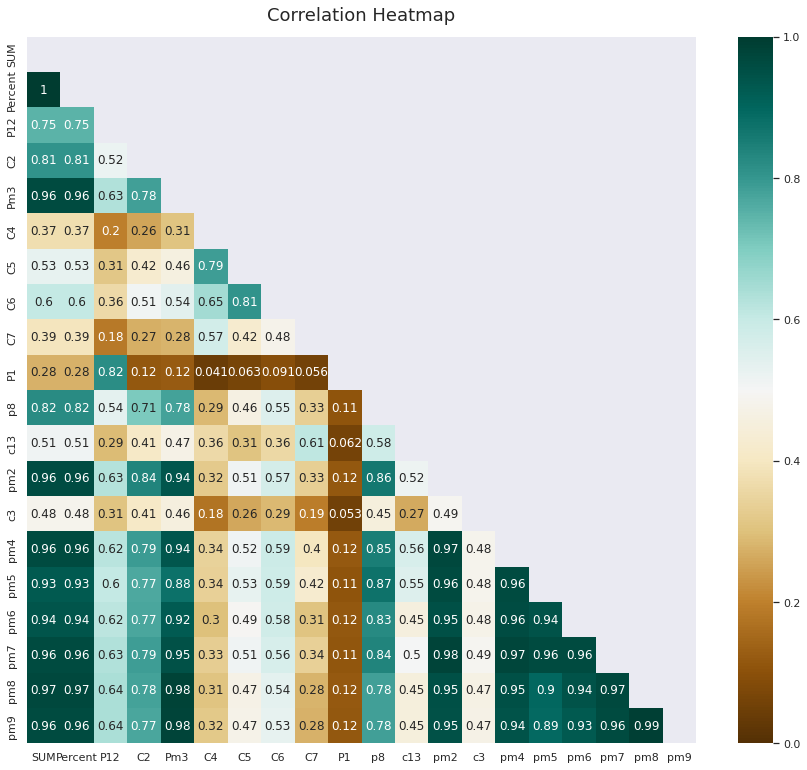

In [59]:
# function to plot correlation
def corre_plot(df):
    # mask    
    np.triu(np.ones_like(df.corr()))

    #visualize array
    plt.figure(figsize=(15, 13))
    
    # define the mask to set the values in the upper triangle to True
    mask = np.triu(np.ones_like(df.corr(), dtype=bool))
    heatmap = sns.heatmap(df.corr(), mask=mask, vmin=0, vmax=1, annot=True, cmap='BrBG')
    heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

    # show plot
    plt.show()
    
# call function
corre_plot(X)

>SUM and Percent are highly correlated to pm4

### visualize the clusters

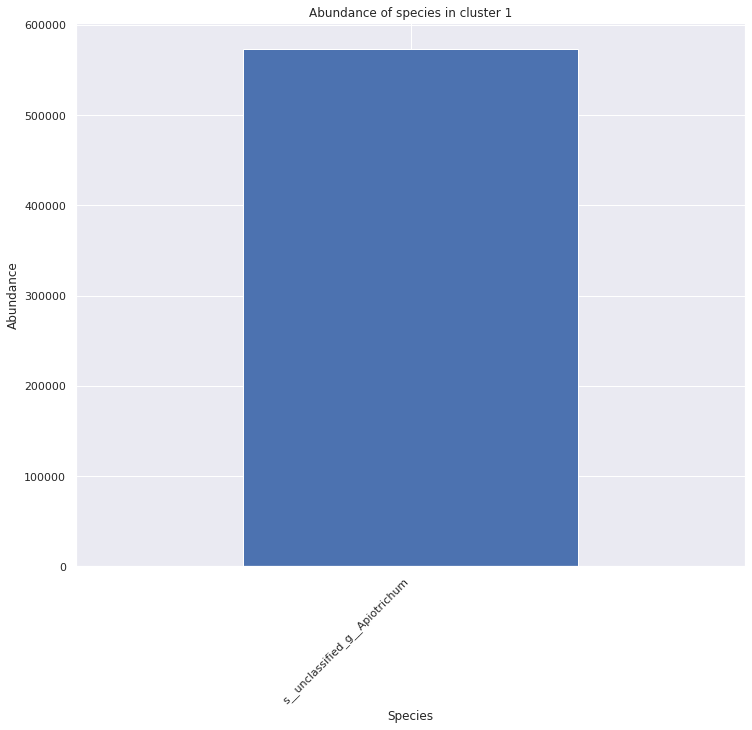

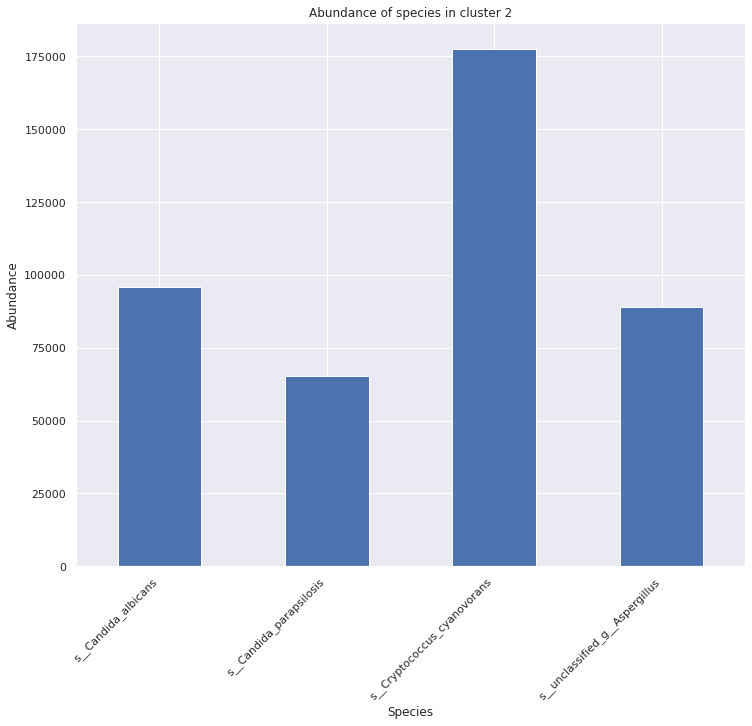

In [60]:
# get the unique cluster labels
clusters = [1, 2]
#clusters = grouped.index.get_level_values('cluster').unique()

# loop through each cluster and create a bar chart
for cluster in clusters:
    # filter the dataframe to get the rows with the current cluster label
    df_cluster = grouped.loc[cluster]
    
    # create a bar chart for the current cluster
    sns.set()
    ax = df_cluster['SUM'].plot(kind='bar', figsize=(12, 10))
    
    # set the title and axis labels
    ax.set_title(f'Abundance of species in cluster {cluster}')
    ax.set_xlabel('Species')
    ax.set_ylabel('Abundance')
    
    # rotate the x-axis labels for better visibility
    plt.xticks(rotation=45, ha='right')
    
    # show the plot
    plt.show()


>Cluster 1 contains one species, **"unclassified_g__Apiotrichum"**, which is highly abundant in all samples. 

>Cluster 2 contains 4 species, including **"Candida albicans" and "Aspergillus"**, which are known to be commonly found in the human microbiome.


### Determine the optimal number of clusters

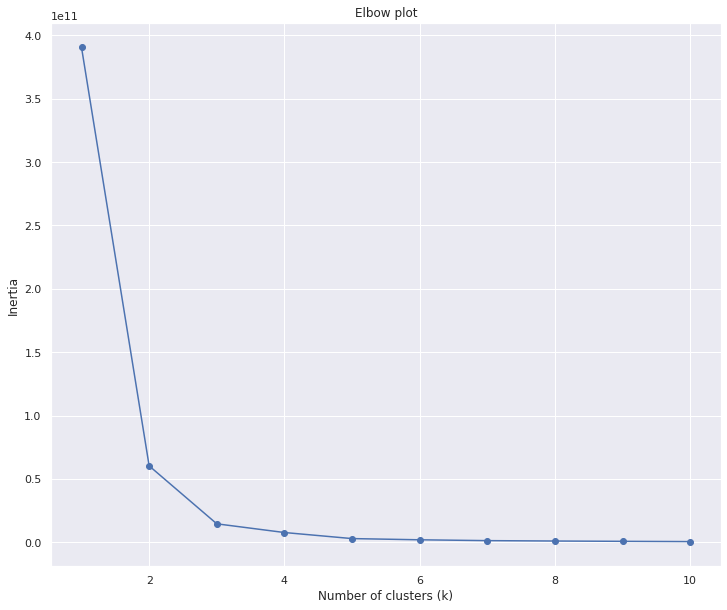

In [61]:
# create an empty list to store the inertia values for different number of clusters
inertia = []

# loop over different values of k to find the optimal number of clusters
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# plot the elbow plot to determine the optimal number of clusters
sns.set()
fig, ax = plt.subplots(figsize=(12, 10))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow plot')
plt.show()

### OTU table

In [62]:
# define the taxonomic levels to aggregate at
tax_levels = ['Phylum', 'Class', 'Order', 'Family', 'Genus']

# group the sequences by the defined taxonomic levels
grouped = df_fungus.groupby(tax_levels)

# sum the sequence counts for each taxonomic group
otu_table = grouped['SUM'].sum()

# transpose the OTU table so that samples are columns and OTUs are rows
otu_table = pd.DataFrame(otu_table.transpose())


# remove any rows that have only zeros (i.e. OTUs that are not present in any sample)
otu_table = otu_table.loc[(otu_table != 0).any(axis=1)]

# divide each row by its sum to convert counts to relative abundances
otu_table = otu_table.div(otu_table.sum(axis=1), axis=0)

otu_table

SUM
Phylum                   Class                                 Order                                  Family                                 Genus                                      
p__Ascomycota            c__Archaeorhizomycetes                o__Archaeorhizomycetales               f__Archaeorhizomycetaceae              g__Archaeorhizomyces                    1.0
                                                               o__unclassified_c__Archaeorhizomycetes f__unclassified_c__Archaeorhizomycetes g__unclassified_c__Archaeorhizomycetes  1.0
                         c__Arthoniomycetes                    o__Lichenostigmatales                  f__Phaeococcomycetaceae                g__Phaeococcomyces                      1.0
                         c__Dothideomycetes                    o__Acrospermales                       f__Acrospermales_fam_Incertae_sedis    g__Leptodiscella                        1.0
                                                               o__Botryosphaeriales                   f__Botryosphaeriaceae                  g__Botryosphaeria                       1.0
...                                                                                                                                                                                  ...
p__Olpidiomycota         c__Olpidiomycetes                     o__Olpidiales                          f__Olpidiaceae                         g__Olpidium                             1.0
p__Rozellomycota         c__Rozellomycotina_cls_Incertae_sedis o__GS11                                f__unclassified_o__GS11                g__unclassified_o__GS11                 1.0
                         c__unclassified_p__Rozellomycota      o__unclassified_p__Rozellomycota       f__unclassified_p__Rozellomycota       g__unclassified_p__Rozellomycota        1.0
p__Zoopagomycota         c__Zoopagomycetes                     o__Zoopagales                          f__Piptocephalidaceae                  g__Syncephalis                          1.0
p__unclassified_k__Fungi c__unclassified_k__Fungi              o__unclassified_k__Fungi               f__unclassified_k__Fungi               g__unclassified_k__Fungi                1.0

[460 rows x 1 columns]

>The OTU table reports the abundance of each OTU (a cluster of sequences that are similar to each other) in each sample.

# 5 Data Preprocessing

### numerical

In [63]:
# select numerical columns
numerical_cols = df_fungus.select_dtypes(include='number')

# import relevant libraries
from sklearn.preprocessing import normalize

# normalize the abundance data using L1 norm
df_norm = pd.DataFrame(normalize(numerical_cols, norm='l1'), columns=numerical_cols.columns)

# print the normalized data
df_norm.head()

,SUM,Percent,P12,C2,Pm3,C4,C5,C6,C7,P1,...,c13,pm2,c3,pm4,pm5,pm6,pm7,pm8,pm9,cluster
0,0.499995,2.857844e-07,0.063212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.099552,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.041992e-05
1,0.500000,2.857874e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
2,0.499994,2.857842e-07,0.005611,0.011442,0.011245,0.002033,0.004583,0.011582,0.009701,0.012228,...,0.003921,0.004432,0.000073,0.007111,0.002533,0.007004,0.000753,0.006358,0.003443,1.123393e-05
3,0.499999,2.857871e-07,0.008488,0.004897,0.012954,0.002229,0.003706,0.002942,0.002319,0.001875,...,0.002421,0.010792,0.003185,0.010533,0.008504,0.012705,0.012130,0.013410,0.013975,8.713235e-07
4,0.499997,2.857858e-07,0.009005,0.007016,0.007683,0.001492,0.007815,0.006529,0.003242,0.001689,...,0.004204,0.017169,0.005234,0.014814,0.019089,0.019505,0.016716,0.009169,0.009231,5.628379e-06


### Dimension reduction

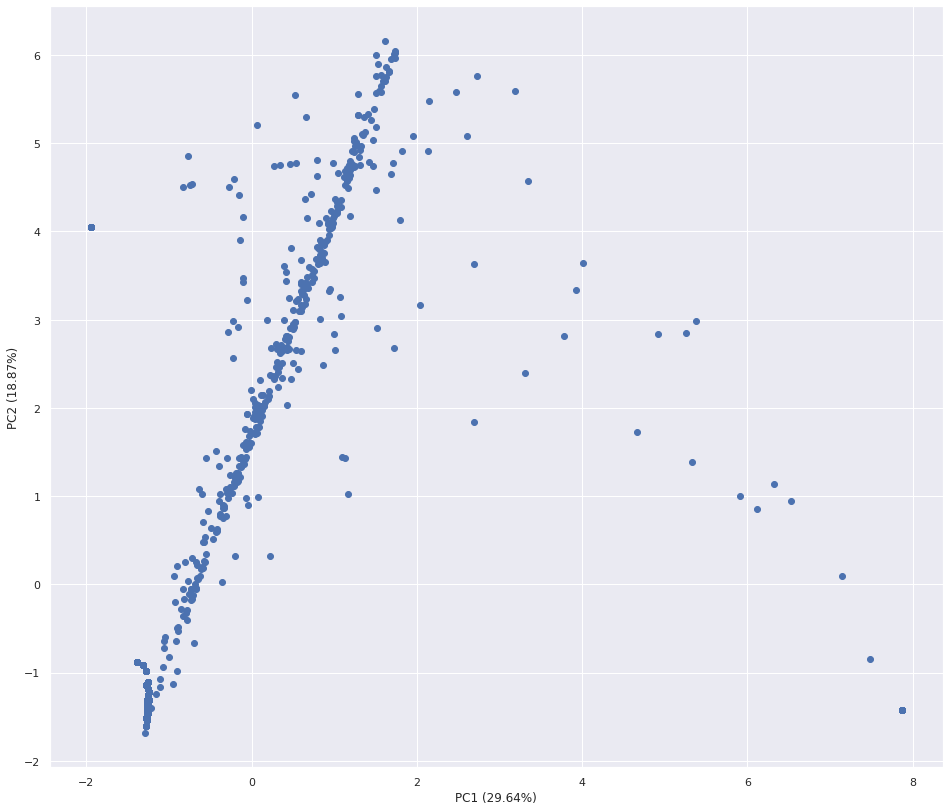

In [64]:
# import neccessary library
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances

# calculate the distance matrix using the Euclidean distance metric
distance_matrix = pairwise_distances(df_norm, metric='euclidean')

# perform PCA on the distance matrix
pca = PCA(n_components=2)
pca.fit(distance_matrix)

# project the data onto the first two principal components
pcoa_data = pca.transform(distance_matrix)

# plot the results
plt.scatter(pcoa_data[:,0], pcoa_data[:,1])
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)")
plt.show()

### conversion of categorical

In [65]:
# import relevant libraries
from sklearn.preprocessing import LabelEncoder

# select categorical columns
numerical_cols = df_fungus.select_dtypes(include='object')

# convert the taxonomic variables to numeric using label encoding
le = LabelEncoder()
df_taxonomic_enc = numerical_cols.apply(le.fit_transform)

# print the encoded data
df_taxonomic_enc.head(7)

,Domain,Kingdom,Phylum,Class,Order,Family,Genus,Species
ASV,,,,,,,,
ASV413,0,0,0,24,59,145,46,65
ASV970,0,0,0,24,59,145,46,65
ASV11,0,0,0,8,26,9,26,605
ASV1,0,0,1,28,70,177,16,603
ASV3,0,0,1,28,67,171,79,119
ASV29,0,0,0,8,26,9,197,654
ASV194,0,0,0,24,59,145,46,70


### target column
PM4 is chosen as a feature because it represents a particular fungal strain or species that is of interest in the context of the data analysis.
* 0 --> Healthy
* 1 --> Unhealthy

In [66]:
# create a new column 'pm4_binary' with values 0 or 1
df_norm['target'] = (df_norm['pm4'] > 0).astype(int)

# print the value counts of the new column
df_norm['target'].value_counts()

0    1659
1      49
Name: target, dtype: int64

combine categorical and numerical columns for modelling

In [67]:
# reset index then concat dfs
df1_reset = df_taxonomic_enc.reset_index(drop=True)
df2_reset = df_norm.reset_index(drop=True)
result = pd.concat([df2_reset, df1_reset], axis=1)

In [68]:
# drop irrelevant colums
irrelevant_columns = ["pm4", "cluster", "Domain", "Kingdom"]
final_df = result.drop(irrelevant_columns, axis=1)
final_df.head(7)

,SUM,Percent,P12,C2,Pm3,C4,C5,C6,C7,P1,...,pm7,pm8,pm9,target,Phylum,Class,Order,Family,Genus,Species
0,0.499995,2.857844e-07,0.063212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.099552,...,0.000000,0.000000,0.000000,0,0,24,59,145,46,65
1,0.500000,2.857874e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0,0,24,59,145,46,65
2,0.499994,2.857842e-07,0.005611,0.011442,0.011245,0.002033,0.004583,0.011582,0.009701,0.012228,...,0.000753,0.006358,0.003443,1,0,8,26,9,26,605
3,0.499999,2.857871e-07,0.008488,0.004897,0.012954,0.002229,0.003706,0.002942,0.002319,0.001875,...,0.012130,0.013410,0.013975,1,1,28,70,177,16,603
4,0.499997,2.857858e-07,0.009005,0.007016,0.007683,0.001492,0.007815,0.006529,0.003242,0.001689,...,0.016716,0.009169,0.009231,1,1,28,67,171,79,119
5,0.500000,2.857874e-07,0.001139,0.004165,0.011505,0.002637,0.016808,0.011415,0.008150,0.008569,...,0.000000,0.009498,0.000000,1,0,8,26,9,197,654
6,0.499992,2.857830e-07,0.000160,0.000000,0.000000,0.025274,0.012755,0.007887,0.074912,0.001490,...,0.007039,0.000000,0.000504,1,0,24,59,145,46,70


# 6 Modelling

In [85]:
# import neccesary libraries
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [69]:
# set predictors
X = final_df.drop("target", axis=1)

# set target
y = final_df["target"]

**Test - Train Split**

In [70]:
# import relevant libraries
from sklearn.model_selection import train_test_split

# split the data into training and test sets, with 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 >**baseline model**
 * **SVM**

In [82]:
# import relevant libraries
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# train a Support Vector Machine (SVM) classifier
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_preds = svm_clf.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_preds)

>**Random Forest**

In [83]:
# import relevant libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# train a random forest model with cross-validation
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Accuracy: {:.2f} (+/- {:.2f})".format(scores.mean(), scores.std() * 2))

Accuracy: 0.92 (+/- 0.22)


>**KNN Classifier**

In [88]:
# train a K-Nearest Neighbors (KNN) classifier
knn_clf = KNeighborsClassifier()

# fit
knn_clf.fit(X_train, y_train)

# use model
knn_preds = knn_clf.predict(X_test)

# validate
scores = cross_val_score(knn_clf, X, y, cv=5, scoring='accuracy')

# print the cross-validation scores
print("Accuracy: {:.2f} (+/- {:.2f})".format(scores.mean(), scores.std() * 2))

Accuracy: 0.95 (+/- 0.01)


>**Naive Bayes Theorem**

In [89]:
# train a Naive Bayes classifier
nb_clf = GaussianNB()

# fit
nb_clf.fit(X_train, y_train)

# use model
nb_preds = nb_clf.predict(X_test)

# evaluate 
scores = cross_val_score(nb_clf, X, y, cv=5, scoring='accuracy')

# print the cross-validation scores
print("Accuracy: {:.2f} (+/- {:.2f})".format(scores.mean(), scores.std() * 2))

Accuracy: 0.60 (+/- 0.46)
